<a href="https://colab.research.google.com/github/DoraemonR/SoYul/blob/main/1%EC%9B%9428%EC%9D%BC_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 전체 데이터셋(training(80) : test(20)) --> training(80) --> 훈련세트 60 : 검증세트 20

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=100)

print(x_train_all.shape, x_test.shape)

(455, 30) (114, 30)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=100)
print(len(x_train), len(x_val))

364 91


In [ ]:
sgd = SGDClassifier(loss='log', random_state=100)
sgd.fit(x_train, y_train)
sgd.score(x_val,y_val)

0.8681318681318682

In [ ]:
# 10-fold 교차검증

import numpy as np
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss = 'log',  penalty= 'l2', alpha=0.001, random_state=100)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10)
print(np.mean(scores['test_score']))

0.9297584541062802


['mean perimeter' 'mean area']


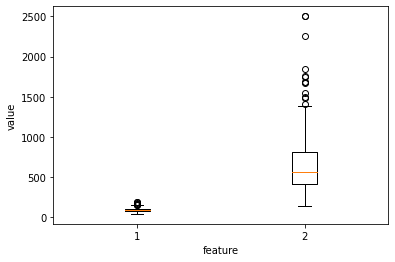

In [ ]:
# 전처리
# 두 특성치의 분포 비교
import matplotlib.pyplot as plt

print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
# 스케일 조정(학습률 추가)

class SingleLayer : 
  
  def __init__(self, learning_rate=0.1):
    self.w=None
    self.b=None
    self.losses = [] # 손실 함수의 결과값 저장할 리스트
    self.w_history = [] # 가중치 저장
    self.lr = learning_rate

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b # 직선 방정식을 계산
    return z

  def backprop(self,x,err):
    w_grad = x * err                               # 가중치에 대한 그레디언트(변화율)을 계산
    b_grad = 1 * err                               # 절편에 대한 그레디언트(변화율)을 계산
    return w_grad, b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))                       # 시그모이드 계산
    return a  

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])                   # 가중치 초기화
    self.b = 0                                     # 절편 초기화
    self.w_history.append(self.w.copy())           # 가중치 기록

    np.random.seed(100)    
    for i in range(epochs):                      # 에포크만큼 반복
      loss = 0  
      indexes = np.random.permutation(np.arange(len(x)))  # 인덱스를 섞는다.                     
      for i in indexes :                    # 모든 행에 대해 반복
        z = self.forpass(x[i])                      # 정방향 계산
        a = self.activation(z)                     # 활성화 함수 적용
        err = -(y[i] - a)                           # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)   # 역방향 계산
        self.w -= self.lr * w_grad                           # 가중치 업데이트(학습률 적용)
        self.b -= b_grad                           # 절편 업데이트
        self.w_history.append(self.w.copy())       # 가중치 기록
        a = np.clip(a, 1e-10, 1-1e-10)             # 1e-10, 1-1e-10 범위값만 선택
        loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a)) 
      self.losses.append(loss/len(y))     # epoch마다 평균 손실 저장
  
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
    return np.array(z) > 0
  
  def score(self, x, y):              # 정확도 계산
    return np.mean(self.predict(x) == y)

In [ ]:
# 모델 훈련하고 평가하기

layer1 = SingleLayer()
layer1.fit(x_train,y_train)
layer1.score(x_val, y_val)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


0.9010989010989011

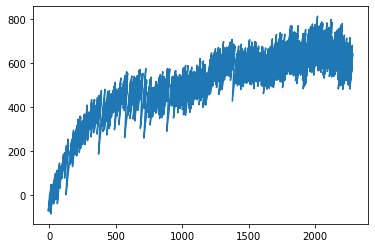

In [ ]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)

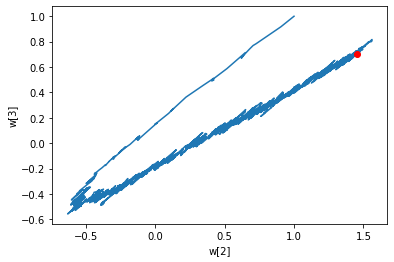

In [ ]:
# 훈련 데이터셋 스케일 조정
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [ ]:
# 검증 데이터셋으로 모델 성능 평가

layer2.score(x_val,y_val)

0.37362637362637363

In [ ]:
# 검증 데이터 셋 표준화처리

val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.9340659340659341

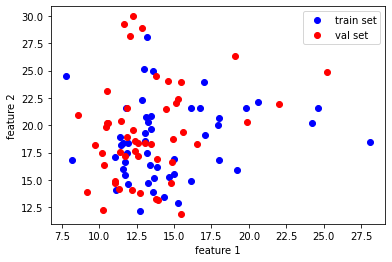

In [ ]:
# [주의!] 원본 훈련 데이터 셋과 검증 데이터 셋의 산점도

plt.plot(x_train[:50,0], x_train[:50,1],'bo')
plt.plot(x_val[:50,0], x_val[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val set'])
plt.show()


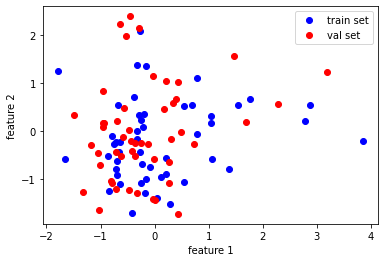

In [ ]:
# [주의!] 전처리한 훈련 데이터 셋과 검증 데이터 셋의 산점도

plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val set'])
plt.show()


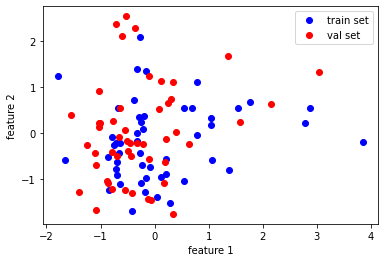

In [ ]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val set'])
plt.show()


In [ ]:
layer2.score(x_val_scaled, y_val)

0.9560439560439561

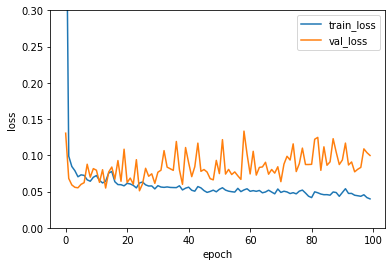

In [ ]:
# overfitting & underfitting

class SingleLayer : 
  
  def __init__(self, learning_rate=0.1):
    self.w=None
    self.b=None
    self.losses = [] # 손실 함수의 결과값 저장할 리스트
    self.val_losses = [] # 검증 데이터 셋의 손실 기록
    self.w_history = []
    self.lr = learning_rate

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b # 직선 방정식을 계산
    return z

  def backprop(self,x,err):
    w_grad = x * err                               # 가중치에 대한 그레디언트(변화율)을 계산
    b_grad = 1 * err                               # 절편에 대한 그레디언트(변화율)을 계산
    return w_grad, b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))                       # 시그모이드 계산
    return a  

  def fit(self, x, y, epochs = 100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1])                   # 가중치 초기화
    self.b = 0                                     # 절편 초기화
    self.w_history.append(self.w.copy())           # 가중치 기록
    np.random.seed(100)
    for i in range(epochs):                      # 에포크만큼 반복
      loss = 0  
      indexes = np.random.permutation(np.arange(len(x)))  # 인덱스를 섞는다.                     
      for i in indexes :                    # 모든 행에 대해 반복
        z = self.forpass(x[i])                      # 정방향 계산
        a = self.activation(z)                     # 활성화 함수 적용
        err = -(y[i] - a)                           # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)   # 역방향 계산
        self.w -= self.lr * w_grad                           # 가중치 업데이트(학습률 적용)
        self.b -= b_grad                           # 절편 업데이트
        self.w_history.append(self.w.copy())       # 가중치 기록
        a = np.clip(a, 1e-10, 1-1e-10)             # 1e-10, 1-1e-10 범위값만 선택
        loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a)) 
      self.losses.append(loss/len(y))     # epoch마다 평균 손실 저장
      self.update_val_loss(x_val, y_val)  # 검증 데이터 셋에 대한 손실 저장

  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])    # 정방향계산
      a = self.activation(z)        # 활성화 함수 적용
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))
  
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
    return np.array(z) > 0
  
  def score(self, x, y):              # 정확도 계산
    return np.mean(self.predict(x) == y)

layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val) 

plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

In [ ]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)


0.967032967032967

In [ ]:
# 로지스틱 회귀에 규제 적용

# 규제 추가

class SingleLayer : 
  
  def __init__(self, learning_rate=0.1, l1=0, l2=0):
    self.w=None
    self.b=None
    self.losses = [] # 손실 함수의 결과값 저장할 리스트
    self.val_losses = [] # 검증 데이터 셋의 손실 기록
    self.w_history = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b # 직선 방정식을 계산
    return z

  def backprop(self,x,err):
    w_grad = x * err                               # 가중치에 대한 그레디언트(변화율)을 계산
    b_grad = 1 * err                               # 절편에 대한 그레디언트(변화율)을 계산
    return w_grad, b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))                       # 시그모이드 계산
    return a  

  def fit(self, x, y, epochs = 100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1])                   # 가중치 초기화
    self.b = 0                                     # 절편 초기화
    self.w_history.append(self.w.copy())           # 가중치 기록
    np.random.seed(100)
    for i in range(epochs):                      # 에포크만큼 반복
      loss = 0  
      indexes = np.random.permutation(np.arange(len(x)))  # 인덱스를 섞는다.                     
      for i in indexes :                    # 모든 행에 대해 반복
        z = self.forpass(x[i])                      # 정방향 계산
        a = self.activation(z)                     # 활성화 함수 적용
        err = -(y[i] - a)                           # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)   # 역방향 계산
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w  # 그레디언트에서 패널티 항의 미분값을 더한다.
        self.w -= self.lr * w_grad                           # 가중치 업데이트(학습률 적용)
        self.b -= b_grad                           # 절편 업데이트
        self.w_history.append(self.w.copy())       # 가중치 기록
        a = np.clip(a, 1e-10, 1-1e-10)             # 1e-10, 1-1e-10 범위값만 선택
        loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a)) 
      self.losses.append(loss/len(y) + self.reg_loss())     # epoch마다 평균 손실 저장
      self.update_val_loss(x_val, y_val)  # 검증 데이터 셋에 대한 손실 저장

  def reg_loss(self):
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])    # 정방향계산
      a = self.activation(z)        # 활성화 함수 적용
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val) + self.reg_loss())  
  
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 정방향 계산
    return np.array(z) > 0
  
  def score(self, x, y):
    return np.mean(self.predict(x) == y)

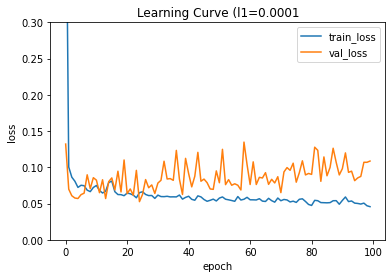

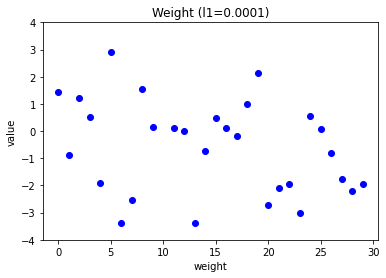

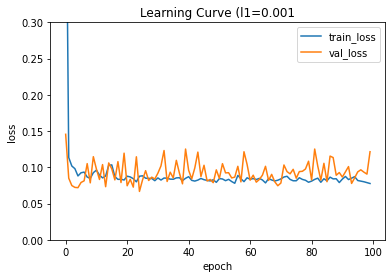

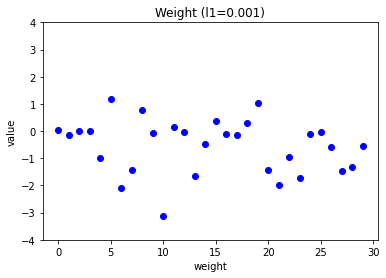

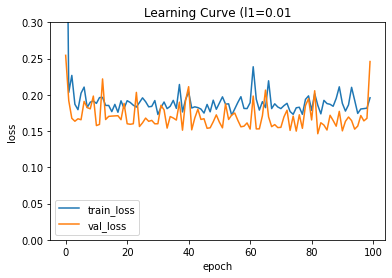

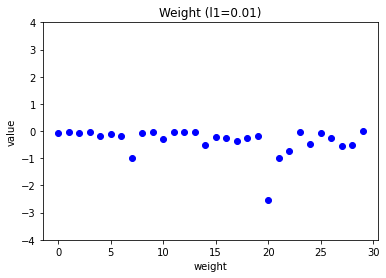

In [ ]:
# cancer 데이터 셋에 L1 규제 적용하기

l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayer(l1=l1)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={}'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1={})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()


In [ ]:
# 모델 성능 확인

layer5 = SingleLayer(l1=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

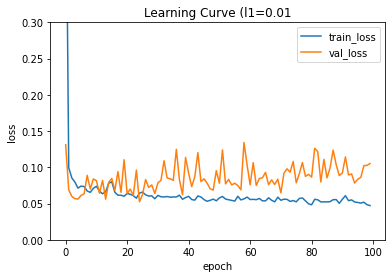

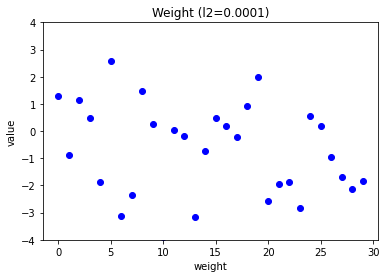

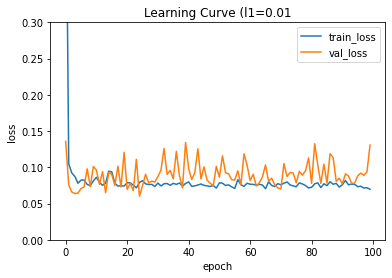

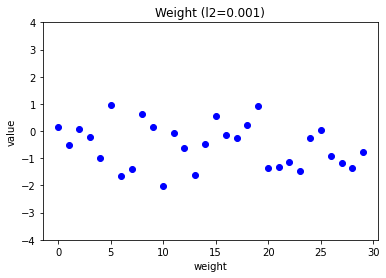

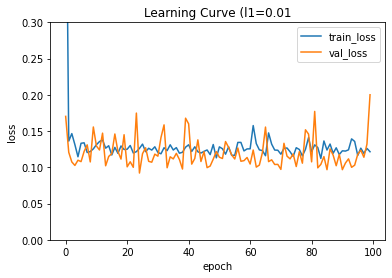

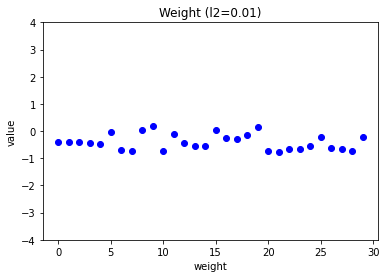

In [ ]:
# cancer 데이터 셋에 L2 규제 적용하기

l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
  lyr = SingleLayer(l2=l2)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={}'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2={})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()


In [ ]:
# 모델 성능 확인

layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=20)
layer6.score(x_val_scaled, y_val)

0.978021978021978

In [ ]:
# 91개의 검증 샘플 중 89개의 샘플을 올바르게 예측

np.sum(layer6.predict(x_val_scaled) == y_val)

89

In [ ]:
# 사이킷런의 SGDClassifier 클래스에서 규제 사용하기

sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.001, random_state=100)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.967032967032967

In [ ]:
# k-fold 교차 검증 구현

validation_scores = [] # 각 폴드의 검증 점수 저장, 이 값을 평균하여 최종 검증 점수를 계산함.

k = 10
bins = len(x_train) // k # 한 폴드에 들어갈 샘플의 개수 = 전체 훈련 세트의 샘플 개수 / k

for i in range(k):
  start = i * bins  # 검증 폴드 샘플의 시작 인덱스
  end = (i+1) * bins  # 끝 인덱스
  val_fold = x_train_all[start:end]  # 검증 세트가 훈련 세트에 포함되어 있으므로 전체 데이터셋을 훈련 셋과 테스트 셋으로 1번만 나눈 x_train_all을 사용.
  val_target = y_train_all[start:end]

  train_index = list(range(0, start)) + list(range(end, len(x_train)))
  train_fold = x_train_all[train_index]
  train_target = y_train_all[train_index]

  train_mean = np.mean(train_fold, axis=0)
  train_std = np.std(train_fold, axis=0)
  train_fold_scaled = (train_fold - train_mean) / train_std
  val_fold_scaled = (val_fold - train_mean) / train_std

  lyr = SingleLayer(l2=0.01)
  lyr.fit(train_fold_scaled, train_target, epochs=50)
  score = lyr.score(val_fold_scaled, val_target)
  validation_scores.append(score)

print(np.mean(validation_scores))

0.9666666666666666


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(),sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))
print(np.mean(scores['train_score']))

0.9735748792270531
0.9870576659311825


In [ ]:
# 다층 신경망 훈련
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', # hidden_layer_sizes(10,10) 두 개의 은닉층에 10개의 뉴런
                    solver ='sgd', alpha=0.01, batch_size=32, # alpha: L2 규제(디폴트=0.0001)
                    learning_rate_init=0.1, max_iter=500)

mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)


0.967032967032967